# Trabalho Prático 1 - Introdução à Banco de Dados

Criação e manipulação de um banco de dados baseado nas despesas públicas do governo federal brasileiro.

<b>Nome:</b> Marco Túlio Motta de Jesus
<br/><b>Matrícula:</b> 2015097990

## Imports

In [1]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Criação da Conexão

In [2]:
conn = sqlite3.connect('../tp1.db')
cursor = conn.cursor()

## Carga dos Dados
Executar o bloco abaixo apenas uma vez, visto que ele é responsável por preencher o banco de dados e esta tarefa não precisa ser repetida.

In [5]:
f = io.open('../despesas_publicas_tp1.sql', 'r', encoding='latin-1')
sql = f.read()
cursor.executescript(sql)

## Requisições
As requisições a serem feitas são escolhidas em função do número de matrícula do estudante. Dessa forma, as requisições definidas foram as de número 1, 2, 3, 8, 10 e 11 (final de matrícula 097990).

### Requisição 1
Liste todos os códigos e nomes de funções da subfunção que possui o maior número de funções.

In [8]:
df = pd.read_sql_query("select f.COD_FUNCAO, f.NOME_FUNCAO " +
                       "from FUNCAO as f natural join DETALHAMENTO_FUNCAO as df " +
                       "where df.COD_SUBFUNCAO = (select COD_SUBFUNCAO from DETALHAMENTO_FUNCAO " +
                       "group by COD_SUBFUNCAO order by count(COD_SUBFUNCAO) desc limit 1)", conn)
df


,COD_FUNCAO,NOME_FUNCAO
0,5,Defesa nacional
1,6,Segurança pública
2,26,Transporte


### Requisição 2
Liste a média de despesas públicas por função (nome) e subfunção (nome), apenas nos casos em que a média excedeu mil reais.

In [9]:
df = pd.read_sql_query("select f.NOME_FUNCAO, sf.NOME_SUBFUNCAO, mt.MEDIA " +
                       "from FUNCAO as f natural join DETALHAMENTO_FUNCAO as df natural join SUBFUNCAO as sf " +
                       "natural join (select COD_DETALHAMENTO, avg(VALOR_DESPESA) as MEDIA " +
                       "from DESPESA_PUBLICA group by COD_DETALHAMENTO) as mt where mt.MEDIA > 1000", conn)
df

,NOME_FUNCAO,NOME_SUBFUNCAO,MEDIA
0,Assistência social,Tecnologia da informação,2266.087692
1,Assistência social,Assistência comunitária,1713.411805
2,Educação,Ensino profissional,1826.135152
3,Educação,Educação básica,4398.185000


### Requisição 3
Liste todos os nomes dos programas de governo e o valor das despesas totais no ano de 2018 para os mesmos, ordenando de forma decrescente pelo valor.

In [10]:
df = pd.read_sql_query("select pg.NOME_PROGRAMA_GOVERNO, sum(VALOR_DESPESA) as DESPESAS_2018 " +
                       "from PROGRAMA_GOVERNO as pg natural join (select * from DESPESA_PUBLICA " +
                       "where ANO_DESPESA = 2018) as A group by COD_PROGRAMA_GOVERNO " +
                       "order by DESPESAS_2018 desc", conn)
df

,NOME_PROGRAMA_GOVERNO,DESPESAS_2018
0,BRASIL SEM MISERIA,387175.60
1,ENEM,334262.06
2,PRONATEC,60262.46
3,CONTROLE DO CANCER,38971.19
4,MAIS MEDICOS,14400.00
5,REGULARIZACAO FUNDIARIA,1497.26
6,REDE CEGONHA,1210.00
7,VIVER SEM LIMITE,0.00
8,SOS EMERGENCIA,0.00
9,MELHOR EM CASA,0.00


#### Visualização da Requisição 3
Programas com gasto 0 foram retirados da amostra para facilitar a visualização.

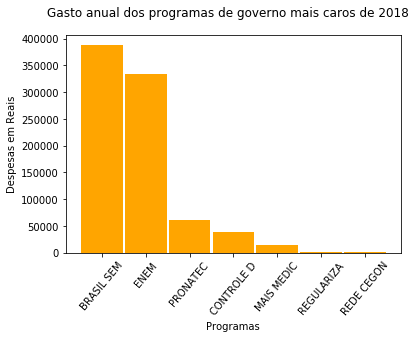

In [11]:
df.drop(df[df['DESPESAS_2018'] == 0].index, inplace=True)
x_axis = df.NOME_PROGRAMA_GOVERNO.tolist()
y_axis = df.DESPESAS_2018.tolist()
for i in range(len(x_axis)):
    x_axis[i] = x_axis[i][0:10]

plt.bar(range(len(x_axis)), y_axis, 0.95, color='orange')
plt.xlabel('Programas')
plt.ylabel('Despesas em Reais')
plt.xticks(range(len(x_axis)), x_axis, rotation=50)
plt.suptitle('Gasto anual dos programas de governo mais caros de 2018')
plt.show()

### Requisição 8
Liste os nomes das subfunções das despesas públicas envolvidas para cada órgão governamental, apenas nos casos em que o valor total das despesas excedeu 10 mil reais. Sua consulta deve retornar o nome do órgão, a subfunção da despesa, a quantidade de entradas de despesas públicas e o valor total dessas despesas.

In [7]:
df = pd.read_sql_query("select o.NOME_ORGAO, sf.NOME_SUBFUNCAO, count(*) as QTDE_ENTRADAS, " +
                       "sum(dp.VALOR_DESPESA) as SOMA_VALOR from SUBFUNCAO as sf natural join DETALHAMENTO_FUNCAO " +
                       "natural join DESPESA_PUBLICA as dp natural join ORGAO as o " +
                       "group by sf.NOME_SUBFUNCAO, o.NOME_ORGAO having SOMA_VALOR > 10000", conn)
df

,NOME_ORGAO,NOME_SUBFUNCAO,QTDE_ENTRADAS,SOMA_VALOR
0,"Ministério da Agricultura, Pecuária e Abastec",Alimentação e nutrição,23,81123.55
1,Ministério da Defesa,Alimentação e nutrição,12,19250.00
2,Ministério do Desenvolvimento Social,Assistência comunitária,88,219668.07
3,Ministério da Saúde,Assistência hospitalar e ambulatorial,138,38971.19
4,Ministério da Saúde,Atenção básica,62,12000.00
5,Ministério da Defesa,Educação básica,12,334126.70
6,Ministério da Educação,Ensino profissional,33,60262.46
7,Ministério do Desenvolvimento Social,Tecnologia da informação,14,58918.28


#### Visualização da Requisição 8

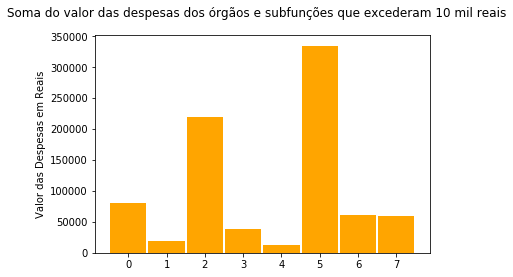

In [12]:
y_axis = df.SOMA_VALOR.tolist()

plt.bar(range(len(y_axis)), y_axis, 0.95, color='orange')
plt.ylabel('Valor das Despesas em Reais')
plt.suptitle('Soma do valor das despesas dos órgãos e subfunções que excederam 10 mil reais')
plt.show()

### Requisição 10
Liste todas as despesas públicas (código da despesa, mês e ano da despesa, modalidade, valor), ordenadas de forma decrescente pelo valor, em que o programa de governo é aquele que possui o maior valor total em despesas durante o ano de 2018.

In [12]:
df = pd.read_sql_query("select COD_DESPESA, MES_DESPESA, ANO_DESPESA, MODALIDADE_DESPESA, VALOR_DESPESA " +
                       "from DESPESA_PUBLICA where COD_PROGRAMA_GOVERNO = (select COD_PROGRAMA_GOVERNO " +
                       "from DESPESA_PUBLICA group by COD_PROGRAMA_GOVERNO " +
                       "order by sum(VALOR_DESPESA) desc limit 1) order by VALOR_DESPESA desc", conn)
df

,COD_DESPESA,MES_DESPESA,ANO_DESPESA,MODALIDADE_DESPESA,VALOR_DESPESA
0,1013,4,2018,TRANSFERENCIAS A MUNICIPIOS - FUNDO A FUNDO,219668.07
1,60,11,2018,Reserva de Contingência,81120.13
2,973,3,2018,Reserva de Contingência,58918.28
3,858,10,2018,Reserva de Contingência,19250.00
4,28,2,2018,Reserva de Contingência,8215.70
5,58,9,2018,Reserva de Contingência,3.42
6,0,11,2018,Reserva de Contingência,0.00
7,1,11,2018,Reserva de Contingência,0.00
8,2,12,2018,Reserva de Contingência,0.00
9,3,3,2018,Reserva de Contingência,0.00


#### VIsualização da Requisição 10
Despesas com gasto 0 foram retiradas da amostra para facilitar a visualização.

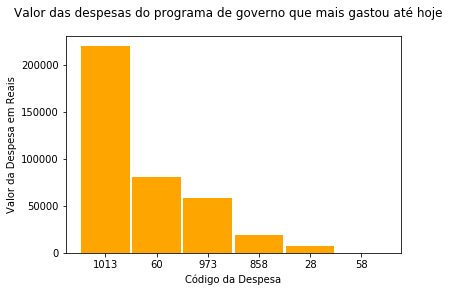

In [13]:
df.drop(df[df['VALOR_DESPESA'] == 0].index, inplace=True)
x_axis = df.COD_DESPESA.tolist()
y_axis = df.VALOR_DESPESA.tolist()

plt.bar(range(len(x_axis)), y_axis, 0.95, color='orange')
plt.xlabel('Código da Despesa')
plt.ylabel('Valor da Despesa em Reais')
plt.xticks(range(len(x_axis)), x_axis)
plt.suptitle('Valor das despesas do programa de governo que mais gastou até hoje')
plt.show()

### Requisição 11
Liste os códigos e nomes dos órgãos governamentais relacionados ao programa de governo (ou programas, caso haja empate) que alcançou mais registros de despesas públicas durante o ano.

In [14]:
df = pd.read_sql_query("select distinct o.COD_ORGAO, o.NOME_ORGAO from ORGAO as o " +
                       "natural join DESPESA_PUBLICA as dp " +
                       "where dp.COD_PROGRAMA_GOVERNO = (select COD_PROGRAMA_GOVERNO from DESPESA_PUBLICA " +
                       "group by COD_PROGRAMA_GOVERNO order by count(COD_PROGRAMA_GOVERNO) desc limit 1)", conn)
df

,COD_ORGAO,NOME_ORGAO
0,20000,Presidência da República
1,22000,"Ministério da Agricultura, Pecuária e Abastec"
2,24000,"Ministério da Ciência, Tecnologia, Inovações"
3,25000,Ministério da Fazenda
4,26000,Ministério da Educação
5,36000,Ministério da Saúde
6,44000,Ministério do Meio Ambiente
7,52000,Ministério da Defesa
8,53000,Ministério da Integração Nacional
9,55000,Ministério do Desenvolvimento Social


### Requisição 12

In [26]:
df = pd.read_sql_query("select distinct f.NOME_FUNCAO, dp.VALOR_DESPESA " +
                       "from FUNCAO as f natural join DETALHAMENTO_FUNCAO as df" +
                       "natural join DESPESA_PUBLICA as dp", conn)
df

,NOME_FUNCAO,VALOR_DESPESA
0,Essencial à justiça,0.00
1,Essencial à justiça,8215.70
2,Essencial à justiça,3.42
3,Essencial à justiça,81120.13
4,Essencial à justiça,1497.26
5,Essencial à justiça,1210.00
6,Essencial à justiça,135.36
7,Essencial à justiça,5000.00
8,Essencial à justiça,726.00
9,Essencial à justiça,2000.00


#### Visualização da Requisição 12

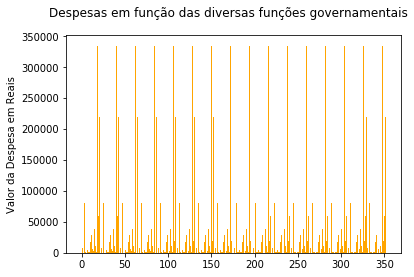

In [27]:
x_axis = df.NOME_FUNCAO.tolist()
y_axis = df.VALOR_DESPESA.tolist()

plt.bar(range(len(x_axis)), y_axis, 0.95, color='orange')
plt.ylabel('Valor da Despesa em Reais')
plt.suptitle('Despesas em função das diversas funções governamentais')
plt.show()

### Requisição 13

In [34]:
df = pd.read_sql_query("select distinct MODALIDADE_DESPESA, VALOR_DESPESA, NOME_ORGAO from ORGAO " +
                       "natural join DESPESA_PUBLICA " +
                       "where MODALIDADE_DESPESA = '" + 'Reserva de Contingência' + "'", conn)
df

,MODALIDADE_DESPESA,VALOR_DESPESA,NOME_ORGAO
0,Reserva de Contingência,0.00,Presidência da República
1,Reserva de Contingência,0.00,"Ministério da Agricultura, Pecuária e Abastec"
2,Reserva de Contingência,8215.70,"Ministério da Agricultura, Pecuária e Abastec"
3,Reserva de Contingência,3.42,"Ministério da Agricultura, Pecuária e Abastec"
4,Reserva de Contingência,81120.13,"Ministério da Agricultura, Pecuária e Abastec"
5,Reserva de Contingência,1497.26,"Ministério da Agricultura, Pecuária e Abastec"
6,Reserva de Contingência,0.00,"Ministério da Ciência, Tecnologia, Inovações"
7,Reserva de Contingência,0.00,Ministério da Fazenda
8,Reserva de Contingência,0.00,Ministério da Educação
9,Reserva de Contingência,1210.00,Ministério da Educação


#### Visualização da Requisição 13

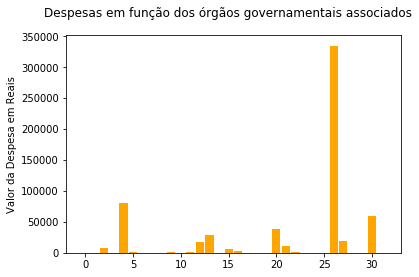

In [52]:
x_axis = df.NOME_ORGAO.tolist()
y_axis = df.VALOR_DESPESA.tolist()

plt.bar(range(len(x_axis)), y_axis, 0.85, color='orange')
plt.ylabel('Valor da Despesa em Reais')
plt.suptitle('Despesas em função dos órgãos governamentais associados')
plt.show()

### Requisição 14

In [54]:
df = pd.read_sql_query("select distinct VALOR_DESPESA, NOME_PROGRAMA_GOVERNO from DESPESA_PUBLICA " +
                       "natural join PROGRAMA_GOVERNO " +
                       "where NOME_PROGRAMA_GOVERNO = '" + 'ENEM' + "'", conn)
df

,VALOR_DESPESA,NOME_PROGRAMA_GOVERNO
0,0.00,ENEM
1,135.36,ENEM
2,334126.70,ENEM


#### Visualização da Requisição 14

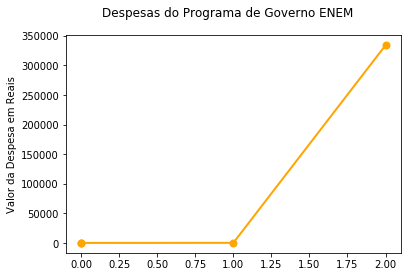

In [72]:
y_axis = df.VALOR_DESPESA.tolist()

plt.plot(range(len(y_axis)), y_axis, 0.95, color="orange", marker="o", linewidth="2", markersize="7")
plt.ylabel('Valor da Despesa em Reais')
plt.suptitle('Despesas do Programa de Governo ENEM')
plt.show()

### Requisição 15

In [74]:
df = pd.read_sql_query("select distinct NOME_PROGRAMA_GOVERNO, QTD_ORGAOS_SUBORDINADOS, VALOR_DESPESA " +
                       "from DESPESA_PUBLICA natural join ORGAO natural join PROGRAMA_GOVERNO " +
                       "where NOME_ORGAO = '" + 'Ministério da Educação' + "'", conn)
df

,NOME_PROGRAMA_GOVERNO,QTD_ORGAOS_SUBORDINADOS,VALOR_DESPESA
0,VIVER SEM LIMITE,104,0.00
1,MELHOR EM CASA,104,0.00
2,REDE CEGONHA,104,1210.00
3,REDE CEGONHA,104,0.00
4,CONTROLE DO CANCER,104,0.00
5,CIENCIA SEM FRONTEIRAS,104,0.00
6,ENEM,104,0.00
7,ENEM,104,135.36
8,PROVA BRASIL,104,0.00
9,PRONATEC,104,0.00


#### VIsualização da Requisição 15

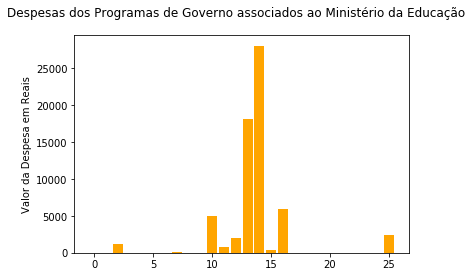

In [79]:
y_axis = df.VALOR_DESPESA.tolist()

plt.bar(range(len(y_axis)), y_axis, 0.85, color="orange")
plt.ylabel('Valor da Despesa em Reais')
plt.suptitle('Despesas dos Programas de Governo associados ao Ministério da Educação')
plt.show()

In [16]:
conn.close()